# 🏥 تحليل غياب المرضى عن المواعيد الطبية

## 📌 مقدمة المشروع

يهدف هذا المشروع إلى تحليل بيانات مواعيد المرضى لمعرفة الأسباب التي تؤدي إلى عدم حضورهم.
الهدف هو اكتشاف أنماط تساعد الجهات الصحية على تقليل نسبة الغياب وتحسين جدولة المواعيد.

## 🧾 فكرة المشروع ببساطة

هذا المشروع يحلل بيانات مواعيد المرضى لمعرفة الأسباب التي تؤدي إلى عدم حضورهم.
من خلال تحليل البيانات تم اكتشاف أن مدة الانتظار بين الحجز والموعد تعتبر من أهم العوامل المؤثرة على التزام المرضى.

الهدف من التحليل هو تقديم فهم واضح يساعد الجهات الصحية على تحسين جدولة المواعيد وتقليل نسبة الغياب بطريقة عملية.


In [50]:
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv("../data/KaggleV2-May-2016.csv")
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [52]:
df.drop(columns= ["PatientId", "AppointmentID"], axis=1,inplace=True)


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110527 non-null  object
 1   ScheduledDay    110527 non-null  object
 2   AppointmentDay  110527 non-null  object
 3   Age             110527 non-null  int64 
 4   Neighbourhood   110527 non-null  object
 5   Scholarship     110527 non-null  int64 
 6   Hipertension    110527 non-null  int64 
 7   Diabetes        110527 non-null  int64 
 8   Alcoholism      110527 non-null  int64 
 9   Handcap         110527 non-null  int64 
 10  SMS_received    110527 non-null  int64 
 11  No-show         110527 non-null  object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


In [54]:
df.shape

(110527, 12)

In [55]:
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show'],
      dtype='object')

In [56]:

df=df[df.Age >0]
df.describe()


,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000
mean,38.316085,0.101031,0.203772,0.074243,0.031406,0.022975,0.323264
std,22.466214,0.301371,0.402804,0.262167,0.174412,0.164115,0.467725
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [57]:
df.describe(include="all")

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,106987,106987,106987,106987.000000,106987,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987
unique,2,100307,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,70118,24,4528,NaN,7586,NaN,NaN,NaN,NaN,NaN,NaN,85307
mean,NaN,NaN,NaN,38.316085,NaN,0.101031,0.203772,0.074243,0.031406,0.022975,0.323264,NaN
std,NaN,NaN,NaN,22.466214,NaN,0.301371,0.402804,0.262167,0.174412,0.164115,0.467725,NaN
min,NaN,NaN,NaN,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,NaN,38.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,NaN,NaN,56.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


In [58]:
df.isna().sum().sort_values(ascending=False)

Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [59]:
df.duplicated().sum()

np.int64(626)

In [60]:
df.nunique().sort_values(ascending=False).head(20)

ScheduledDay      100307
Age                  102
Neighbourhood         81
AppointmentDay        27
Handcap                5
Gender                 2
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
SMS_received           2
No-show                2
dtype: int64

In [61]:
df.Handcap =df.Handcap.map(lambda x:0 if x==0 else 1)

C:\Users\Hanan\AppData\Local\Temp\ipykernel_3924\2215830367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Handcap =df.Handcap.map(lambda x:0 if x==0 else 1)


In [62]:
df["No-show"].value_counts()

No-show
No     85307
Yes    21680
Name: count, dtype: int64

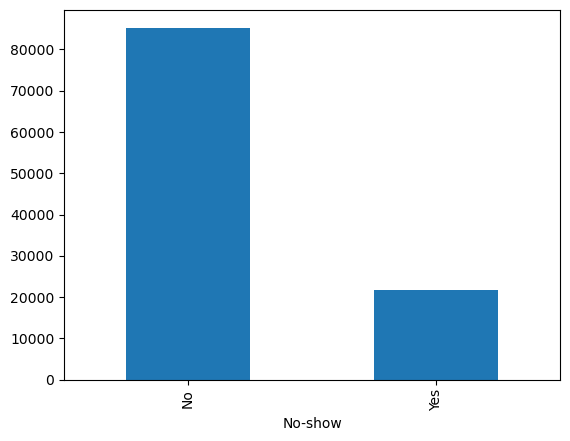

In [63]:
df["No-show"].value_counts().plot(kind="bar")
plt.savefig("../images/no_show_distribution.png", bbox_inches="tight")

In [64]:
# df["Handcap"].value_counts().plot(kind="bar")

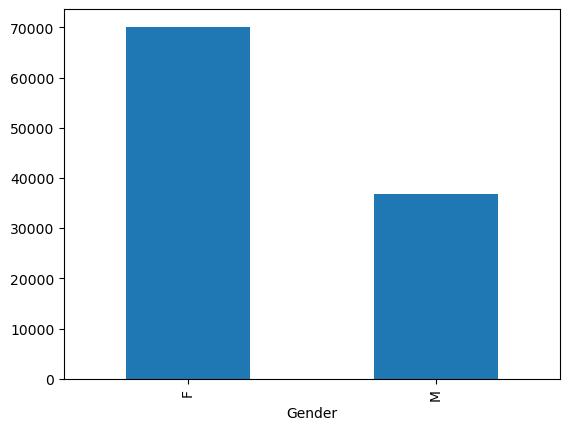

In [91]:
df.Gender.value_counts().plot(kind="bar")
plt.savefig("../images/gender_distribution.png", bbox_inches="tight")
plt.show()

In [66]:
df = df.rename(columns={
    "No-show": "NoShow",
    "Hipertension": "Hypertension",
    "Handcap": "Handicap",
    "SMS_received": "SMSReceived",
    "AppointmentID": "AppointmentId",
    "PatientId": "PatientId"
})

In [67]:
df.ScheduledDay=pd.to_datetime(df.ScheduledDay,errors="coerce",utc=True)
df.AppointmentDay=pd.to_datetime(df.AppointmentDay,errors="coerce",utc=True)

In [68]:
df.ScheduledDay.dt.strftime("%Y-%m-%D %H:%M:%S")
df.AppointmentDay.dt.strftime("%Y-%m-%D %H:%M:%S")

0         2016-04-04/29/16 00:00:00
1         2016-04-04/29/16 00:00:00
2         2016-04-04/29/16 00:00:00
3         2016-04-04/29/16 00:00:00
4         2016-04-04/29/16 00:00:00
                    ...            
110522    2016-06-06/07/16 00:00:00
110523    2016-06-06/07/16 00:00:00
110524    2016-06-06/07/16 00:00:00
110525    2016-06-06/07/16 00:00:00
110526    2016-06-06/07/16 00:00:00
Name: AppointmentDay, Length: 106987, dtype: object

In [69]:
df["WaitingDays"] =(  df["AppointmentDay"].dt.normalize() - df["ScheduledDay"].dt.normalize()).dt.days
df
df = df[df["WaitingDays"] >= 0]


In [70]:
df.Gender.unique()


array(['F', 'M'], dtype=object)

In [71]:
sorted(df.Age.unique())

[np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(10),
 np.int64(11),
 np.int64(12),
 np.int64(13),
 np.int64(14),
 np.int64(15),
 np.int64(16),
 np.int64(17),
 np.int64(18),
 np.int64(19),
 np.int64(20),
 np.int64(21),
 np.int64(22),
 np.int64(23),
 np.int64(24),
 np.int64(25),
 np.int64(26),
 np.int64(27),
 np.int64(28),
 np.int64(29),
 np.int64(30),
 np.int64(31),
 np.int64(32),
 np.int64(33),
 np.int64(34),
 np.int64(35),
 np.int64(36),
 np.int64(37),
 np.int64(38),
 np.int64(39),
 np.int64(40),
 np.int64(41),
 np.int64(42),
 np.int64(43),
 np.int64(44),
 np.int64(45),
 np.int64(46),
 np.int64(47),
 np.int64(48),
 np.int64(49),
 np.int64(50),
 np.int64(51),
 np.int64(52),
 np.int64(53),
 np.int64(54),
 np.int64(55),
 np.int64(56),
 np.int64(57),
 np.int64(58),
 np.int64(59),
 np.int64(60),
 np.int64(61),
 np.int64(62),
 np.int64(63),
 np.int64(64),
 np.int64(65),
 np.int64(66),
 np.int64(67),
 np.

In [72]:
# df[["Age","Hypertension","Diabetes","Alcoholism","Handicap","SMSReceived"]].hist(figsize=(15,15))

## 📊 التحليل الاستكشافي للبيانات


In [73]:
df["WaitingDays"].describe()

count    106982.000000
mean         10.167290
std          15.263631
min           0.000000
25%           0.000000
50%           4.000000
75%          14.000000
max         179.000000
Name: WaitingDays, dtype: float64

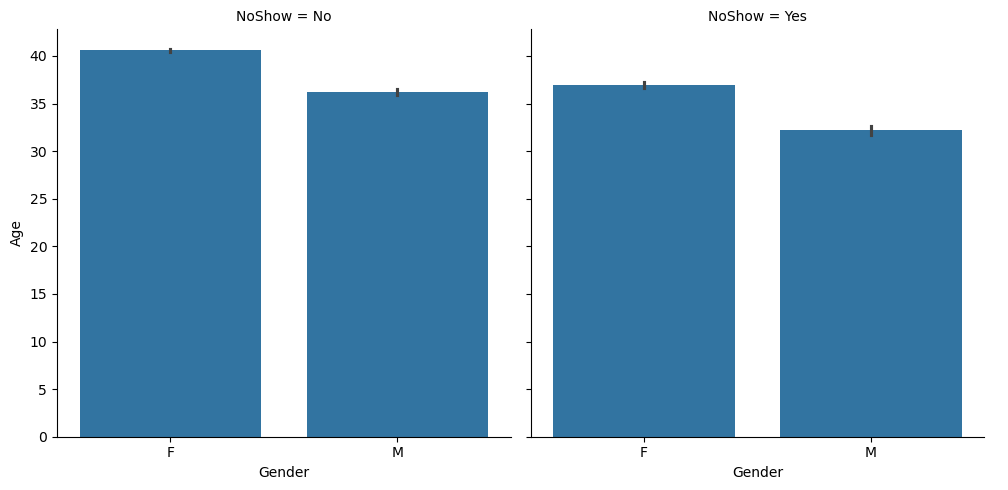

In [74]:
import seaborn as sns
sns.catplot(x="Gender",data=df,y="Age",col=df.NoShow,kind="bar")

In [75]:
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap',
       'SMSReceived', 'NoShow', 'WaitingDays'],
      dtype='object')

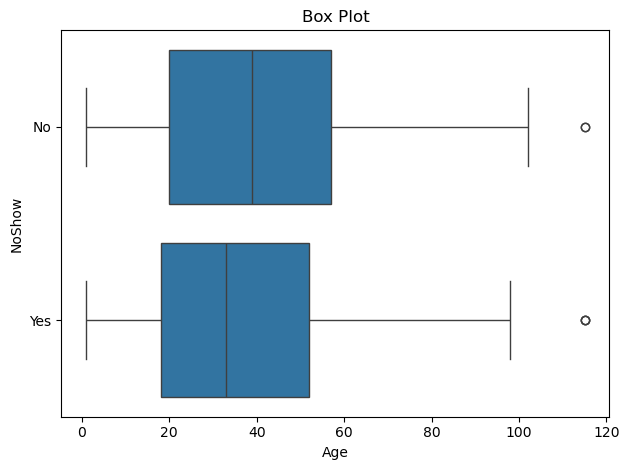

In [76]:

sns.boxplot(data=df, x=df.Age, y=df.NoShow)
plt.title("Box Plot")
plt.tight_layout()
plt.show()

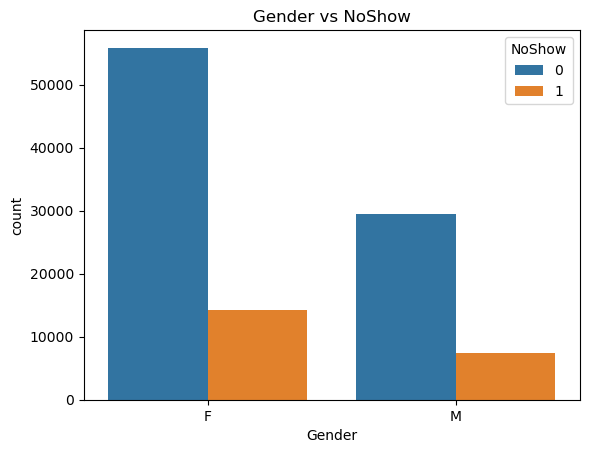

In [93]:
sns.countplot(data=df, x=df.Gender,hue=df.NoShow)
plt.title("Gender vs NoShow")
plt.savefig("../images/gender_noshow.png", bbox_inches="tight")
plt.show()

In [78]:
# df["Age"].hist(bins=30)

df["Age"].describe()
df["Age"].skew()

def skew_label(x):

    if abs(x) < 0.5:
        return "طبيعي"
    elif abs(x) < 1:
        return "متوسط"
    else:
        return "عالي"
skew_label(df["Age"].skew())





'طبيعي'

<Axes: ylabel='Age'>

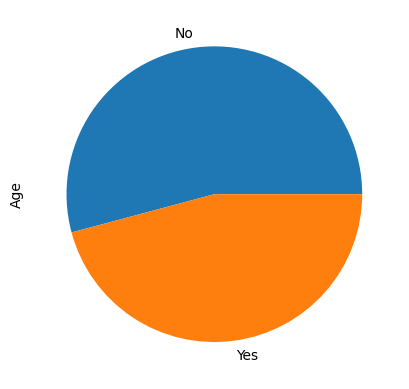

In [79]:
df.groupby("NoShow")["Age"].median().plot(kind="pie")

In [80]:

df.NoShow =df.NoShow.map(lambda x: 0 if x=="No" else 1)

C:\Users\Hanan\AppData\Local\Temp\ipykernel_3924\2290158398.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df["NoShow"]==0]["Age"],


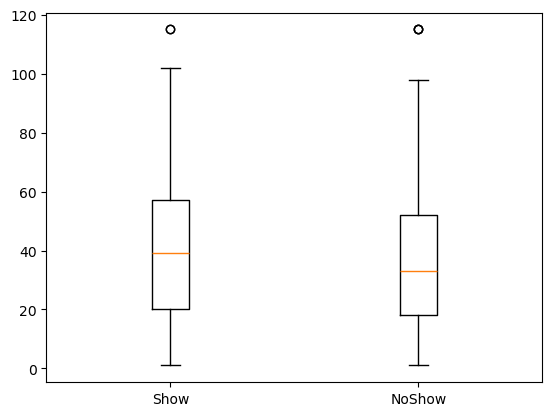

In [81]:
plt.boxplot([df[df["NoShow"]==0]["Age"],
             df[df["NoShow"]==1]["Age"]],
            labels=["Show","NoShow"]);


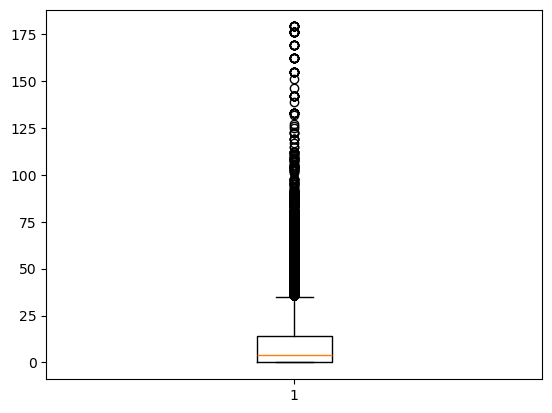

In [82]:
plt.boxplot(df["WaitingDays"]);

In [83]:
df["WaitingDays"].describe()


count    106982.000000
mean         10.167290
std          15.263631
min           0.000000
25%           0.000000
50%           4.000000
75%          14.000000
max         179.000000
Name: WaitingDays, dtype: float64

In [84]:
df["WaitingDays"].skew()

np.float64(2.6901350735843863)

In [85]:
df["WaitingGroup"] = pd.cut(
    df["WaitingDays"],
    bins=[-1,0,3,7,14,30,180],
    labels=["SameDay","1-3","4-7","8-14","15-30","30+"]
)

In [86]:
pd.crosstab(df["WaitingGroup"], df["NoShow"], normalize="index")

NoShow,0,1
WaitingGroup,,
SameDay,0.953141,0.046859
1-3,0.770538,0.229462
4-7,0.749110,0.250890
8-14,0.694778,0.305222
15-30,0.672560,0.327440
30+,0.668367,0.331633


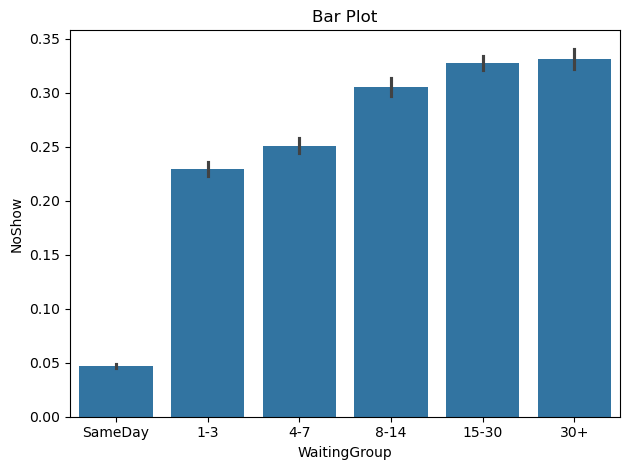

In [95]:

sns.barplot(data=df, x="WaitingGroup", y="NoShow")
plt.savefig("../images/waitingdays_boxplot.png", bbox_inches="tight")
plt.title("Bar Plot")
plt.tight_layout()
plt.show()



In [88]:
pd.crosstab(df.SMSReceived,df.NoShow,normalize="index")

NoShow,0,1
SMSReceived,,
0,0.832769,0.167231
1,0.723348,0.276652


In [89]:
df.groupby("SMSReceived")["WaitingDays"].median()

SMSReceived
0     0.0
1    14.0
Name: WaitingDays, dtype: float64

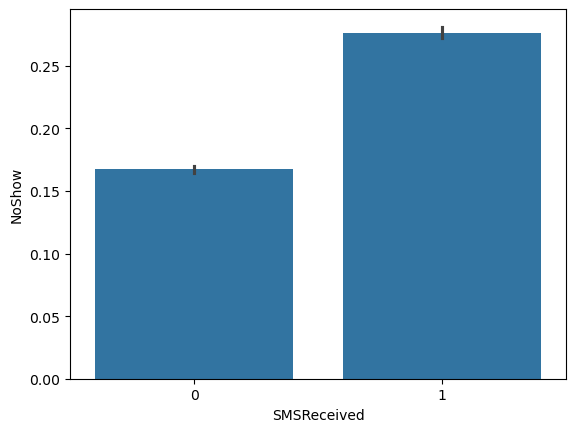

In [ ]:
sns.barplot(data=df, x="SMSReceived", y="NoShow")
plt.title("SMSReceived vs NoShow")
plt.savefig("../images/sms_analysis.png", bbox_inches="tight")
plt.show()

## 💡 أهم الاستنتاجات
- مدة الانتظار تعتبر عامل مهم في عدم الحضور.
- بعض الأيام تظهر نسب غياب أعلى.
